In [1]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad('combined.h5ad')
adata

AnnData object with n_obs × n_vars = 108822 × 29581
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [3]:
adata.obs.groupby('Sample').count()

C:\Users\alexg\AppData\Local\Temp\ipykernel_1716\2340059915.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('Sample').count()


doublet  n_genes  n_genes_by_counts  total_counts  \
Sample                                                           
C51ctr          5960     5960               5960          5960   
C52ctr          4415     4415               4415          4415   
C53ctr          6928     6928               6928          6928   
C54ctr          4284     4284               4284          4284   
C55ctr          5565     5565               5565          5565   
C56ctr          3904     3904               3904          3904   
C57ctr          4687     4687               4687          4687   
L01cov          2952     2952               2952          2952   
L03cov          3953     3953               3953          3953   
L04cov          3401     3401               3401          3401   
L04covaddon     4386     4386               4386          4386   
L05cov          2696     2696               2696          2696   
L06cov          6306     6306               6306          6306   
L07cov          4753     4753               4753          4753   
L08cov          3767     3767               3767          3767   
L09cov          3368     3368               3368          3368   
L10cov          1501     1501               1501          1501   
L11cov          2888     2888               2888          2888   
L12cov          3648     3648               3648          3648   
L13cov          4732     4732               4732          4732   
L15cov          3905     3905               3905          3905   
L16cov          1773     1773               1773          1773   
L17cov          4341     4341               4341          4341   
L18cov          2633     2633               2633          2633   
L19cov          2429     2429               2429          2429   
L21cov          3257     3257               3257          3257   
L22cov          6390     6390               6390          6390   

             total_counts_mt  pct_counts_mt  total_counts_ribo  \
Sample                                                           
C51ctr                  5960           5960               5960   
C52ctr                  4415           4415               4415   
C53ctr                  6928           6928               6928   
C54ctr                  4284           4284               4284   
C55ctr                  5565           5565               5565   
C56ctr                  3904           3904               3904   
C57ctr                  4687           4687               4687   
L01cov                  2952           2952               2952   
L03cov                  3953           3953               3953   
L04cov                  3401           3401               3401   
L04covaddon             4386           4386               4386   
L05cov                  2696           2696               2696   
L06cov                  6306           6306               6306   
L07cov                  4753           4753               4753   
L08cov                  3767           3767               3767   
L09cov                  3368           3368               3368   
L10cov                  1501           1501               1501   
L11cov                  2888           2888               2888   
L12cov                  3648           3648               3648   
L13cov                  4732           4732               4732   
L15cov                  3905           3905               3905   
L16cov                  1773           1773               1773   
L17cov                  4341           4341               4341   
L18cov                  2633           2633               2633   
L19cov                  2429           2429               2429   
L21cov                  3257           3257               3257   
L22cov                  6390           6390               6390   

             pct_counts_ribo  
Sample                        
C51ctr                  5960  
C52ctr                  4415  
C53ctr                  6928  
C54ctr                  4284

Reduce the count of genes for each patient sample.

In [4]:
sc.pp.filter_genes(adata, min_cells=100)

In [5]:
adata #21306 genes

AnnData object with n_obs × n_vars = 108822 × 21306
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

### Integration via SCVI

In [6]:
# save the raw data into 'counts' layer
adata.layers['counts'] = adata.X.copy()

In [7]:
# normalize the counts to 10,000 to every cell
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = (adata)

In [8]:
adata.obs.head()

Sample  doublet  n_genes  n_genes_by_counts  \
CGTTCTGGTACTAGCT-1_1  C51ctr    False     2434               2434   
CTGGCAGGTTCGGTAT-1_1  C51ctr    False     2444               2444   
ACACCAACACAACGCC-1_1  C51ctr    False     2451               2451   
CCTCAACCATACAGGG-1_1  C51ctr    False     2276               2276   
ACAAAGATCCACAGGC-1_1  C51ctr    False     2310               2310   

                      total_counts  total_counts_mt  pct_counts_mt  \
CGTTCTGGTACTAGCT-1_1        6047.0              0.0            0.0   
CTGGCAGGTTCGGTAT-1_1        5899.0              0.0            0.0   
ACACCAACACAACGCC-1_1        5497.0              0.0            0.0   
CCTCAACCATACAGGG-1_1        5434.0              0.0            0.0   
ACAAAGATCCACAGGC-1_1        5504.0              0.0            0.0   

                      total_counts_ribo  pct_counts_ribo  
CGTTCTGGTACTAGCT-1_1                1.0         0.016537  
CTGGCAGGTTCGGTAT-1_1                5.0         0.084760  
ACACCAACACAACGCC-1_1                3.0         0.054575  
CCTCAACCATACAGGG-1_1                0.0         0.000000  
ACAAAGATCCACAGGC-1_1                1.0         0.018169

In [9]:
adata

AnnData object with n_obs × n_vars = 108822 × 21306
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

You generally want to have roughly half the number of genes to the number of cells. Cells (28379) can be rounded to 30,000; and Genes (16471) can be rounded to 15,000. Which is good to continue without filtering genes.

In [10]:
scvi.model.SCVI.setup_anndata(adata, layer='counts',
                              categorical_covariate_keys=["Sample"], #add "batch" if pre-processed in batches; "technology" if pre-processed from multiple computers.
                              continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [11]:
model = scvi.model.SCVI(adata)

In [12]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 74/74: 100%|██████████| 74/74 [5:45:36<00:00, 285.43s/it, v_num=1, train_loss_step=3.45e+3, train_loss_epoch=2.95e+3]  

`Trainer.fit` stopped: `max_epochs=74` reached.


Epoch 74/74: 100%|██████████| 74/74 [5:45:36<00:00, 280.22s/it, v_num=1, train_loss_step=3.45e+3, train_loss_epoch=2.95e+3]


In [13]:
model.get_latent_representation().shape

(108822, 10)

We will use this model for Clustering and UMAP

In [14]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [15]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size=1e4)

## Clustering: Neighbors Algorithm

In [16]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [34]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

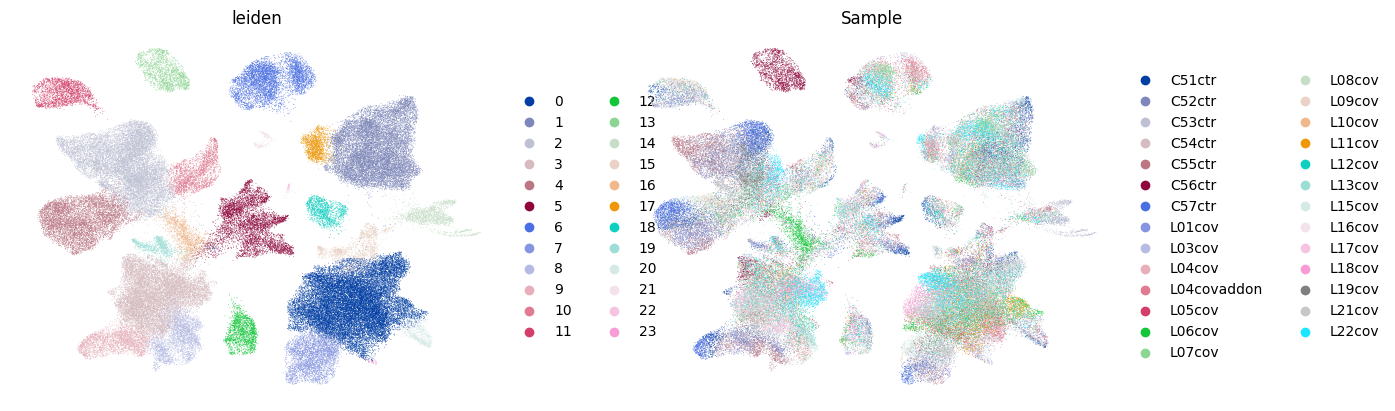

In [35]:
sc.pl.umap(adata, color=['leiden','Sample'], frameon=False)

In [19]:
sc.tl.rank_genes_groups(adata, 'leiden')

c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:440: PerformanceWarning: DataFrame is h

In [20]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
markers

group   names      scores  logfoldchanges     pvals  pvals_adj
0          0    CTSB  203.632431        5.819535  0.000000   0.000000
1          0   LRMDA  184.706329        3.060035  0.000000   0.000000
2          0   DMXL2  171.661407        4.306911  0.000000   0.000000
3          0    FMN1  171.438934        4.035999  0.000000   0.000000
4          0  PLXDC2  171.329559        3.214132  0.000000   0.000000
...      ...     ...         ...             ...       ...        ...
490833    23     PHB    2.136136        4.264579  0.037395   0.048823
490834    23  ATP5PB    2.133287        2.916935  0.037639   0.049132
490835    23  CHI3L1    2.132063        4.006496  0.037745   0.049267
490836    23    MCL1    2.131377        1.245404  0.037802   0.049339
490837    23  MBOAT7    2.125648        2.372370  0.038301   0.049981

[73842 rows x 6 columns]

In [21]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|██████████| 24/24 [26:35<00:00, 66.50s/it]


proba_de  proba_not_de  bayes_factor        scale1    scale2  \
ZC3H12B      0.9942        0.0058      5.144079  7.703310e-07  0.000038   
PLA2G7       0.9942        0.0058      5.144079  2.136911e-04  0.000007   
STAC         0.9938        0.0062      5.076985  2.836757e-04  0.000071   
KIAA1324L    0.9934        0.0066      5.014062  1.327867e-06  0.000130   
CD14         0.9926        0.0074      4.898846  8.042142e-05  0.000004   
...             ...           ...           ...           ...       ...   
USP14        0.5786        0.4214      0.317029  7.376346e-05  0.000070   
RNF10        0.5638        0.4362      0.256599  8.302867e-05  0.000095   
RTF1         0.5520        0.4480      0.208755  6.921577e-05  0.000077   
YME1L1       0.5496        0.4504      0.199055  9.678536e-05  0.000100   
ACTR10       0.5284        0.4716      0.113722  4.359443e-05  0.000045   

           pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  \
ZC3H12B             0.0   0.25 -5.858848   -6.204497  2.676519  ...   
PLA2G7              0.0   0.25  7.298535    7.577466  2.981443  ...   
STAC                0.0   0.25  5.506760    5.671638  3.070292  ...   
KIAA1324L           0.0   0.25 -6.249854   -6.433244  2.892298  ...   
CD14                0.0   0.25  7.146419    7.188189  3.711690  ...   
...                 ...    ...       ...         ...       ...  ...   
USP14               0.0   0.25  0.127993    0.126769  0.456076  ...   
RNF10               0.0   0.25 -0.134541   -0.086908  0.474516  ...   
RTF1                0.0   0.25 -0.099130   -0.106490  0.438666  ...   
YME1L1              0.0   0.25 -0.019663   -0.008995  0.418732  ...   
ACTR10              0.0   0.25 -0.034963   -0.058357  0.411380  ...   

           raw_mean1  raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
ZC3H12B     0.000391   0.036877               0.000391               0.030422   
PLA2G7      0.316623   0.005115               0.197739               0.004113   
STAC        0.248789   0.106192               0.141813               0.036469   
KIAA1324L   0.001261   0.172193               0.001131               0.098069   
CD14        0.140813   0.004591               0.107197               0.003798   
...              ...        ...                    ...                    ...   
USP14       0.169811   0.106632               0.132075               0.093722   
RNF10       0.094340   0.116212               0.075472               0.105186   
RTF1        0.056604   0.096215               0.037736               0.087240   
YME1L1      0.283019   0.134674               0.245283               0.117773   
ACTR10      0.056604   0.068992               0.056604               0.062941   

           raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
ZC3H12B                0.004136              0.286849            True   
PLA2G7                 2.249796              0.038519            True   
STAC                   1.666475              0.558670            True   
KIAA1324L              0.009129              1.147660            True   
CD14                   0.907517              0.029690            True   
...                         ...                   ...             ...   
USP14                  2.165671              0.769663           False   
RNF10                  0.811988              0.919354           False   
RTF1                   0.264289              0.753107           False   
YME1L1                 3.320918              1.027020           False   
ACTR10                 0.594143              0.498697           False   

           comparison  group1 group2  
ZC3H12B     0 vs Rest       0   Rest  
PLA2G7      0 vs Rest       0   Rest  
STAC        0 vs Rest       0   Rest  
KIAA1324L   0 vs Rest       0   Rest  
CD14        0 vs Rest       0   Rest  
...               ...     ...    ...  
USP14      23 vs Rest      23   Rest  
RNF10      23 vs Rest      23   Rest  
RTF1       23 vs Rest      23   Rest  
YME1L1     23 vs 

In [22]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > 0.5)]
markers_scvi

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
PLA2G7       0.9942        0.0058      5.144079  0.000214  0.000007   
STAC         0.9938        0.0062      5.076985  0.000284  0.000071   
CD14         0.9926        0.0074      4.898846  0.000080  0.000004   
C1QC         0.9926        0.0074      4.898846  0.000148  0.000012   
CTSB         0.9926        0.0074      4.898846  0.001663  0.000115   
...             ...           ...           ...       ...       ...   
UBAC1        0.8996        0.1004      2.192788  0.000035  0.000020   
PPP2R2C      0.8996        0.1004      2.192788  0.000005  0.000003   
TEX26-AS1    0.8996        0.1004      2.192788  0.000005  0.000008   
USP1         0.8996        0.1004      2.192788  0.000027  0.000017   
ZNF865       0.8996        0.1004      2.192788  0.000014  0.000007   

           pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  \
PLA2G7              0.0   0.25  7.298535    7.577466  2.981443  ...   
STAC                0.0   0.25  5.506760    5.671638  3.070292  ...   
CD14                0.0   0.25  7.146419    7.188189  3.711690  ...   
C1QC                0.0   0.25  6.913927    7.199555  3.594682  ...   
CTSB                0.0   0.25  5.446169    5.473509  2.570509  ...   
...                 ...    ...       ...         ...       ...  ...   
UBAC1               0.0   0.25  1.300299    1.349943  1.205980  ...   
PPP2R2C             0.0   0.25  1.166313    1.166866  1.336207  ...   
TEX26-AS1           0.0   0.25  0.543859    0.553548  2.153608  ...   
USP1                0.0   0.25  1.034782    1.108212  1.117681  ...   
ZNF865              0.0   0.25  1.410884    1.308907  1.068812  ...   

           raw_mean1  raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
PLA2G7      0.316623   0.005115               0.197739               0.004113   
STAC        0.248789   0.106192               0.141813               0.036469   
CD14        0.140813   0.004591               0.107197               0.003798   
C1QC        0.202257   0.013516               0.134464               0.009251   
CTSB        3.388305   0.143245               0.713590               0.055309   
...              ...        ...                    ...                    ...   
UBAC1       0.000000   0.036335               0.000000               0.033337   
PPP2R2C     0.000000   0.003420               0.000000               0.003089   
TEX26-AS1   0.000000   0.011281               0.000000               0.007355   
USP1        0.018868   0.023766               0.018868               0.022589   
ZNF865      0.018868   0.010159               0.018868               0.009994   

           raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
PLA2G7                 2.249796              0.038519            True   
STAC                   1.666475              0.558670            True   
CD14                   0.907517              0.029690            True   
C1QC                   1.105650              0.073671            True   
CTSB                  19.639969              0.862526            True   
...                         ...                   ...             ...   
UBAC1                  0.000000              0.259655            True   
PPP2R2C                0.000000              0.024421            True   
TEX26-AS1              0.000000              0.064842            True   
USP1                   0.470522              0.185412            True   
ZNF865                 0.112443              0.074085            True   

           comparison  group1 group2  
PLA2G7      0 vs Rest       0   Rest  
STAC        0 vs Rest       0   Rest  
CD14        0 vs Rest       0   Rest  
C1QC        0 vs Rest       0   Rest  
CTSB        0 vs Rest       0   Rest  
...               ...     ...    ...  
UBAC1      23 vs Rest      23   Rest  
PPP2R2C    23 vs Rest      23   Rest  
TEX26-AS1  23 vs Rest      23   Rest  
USP1       23 vs Rest      23   Rest  
ZNF865     23 vs Rest     

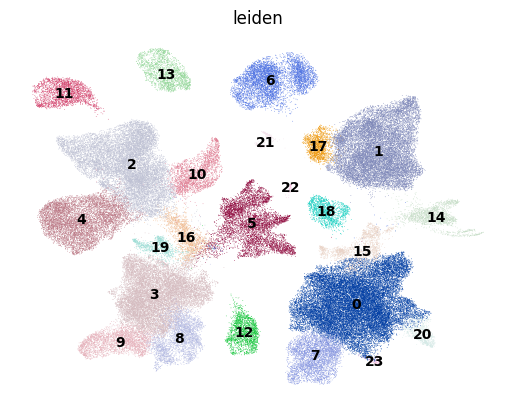

In [24]:
sc.pl.umap(adata, color = ['leiden'], frameon=False, legend_loc = 'on data')

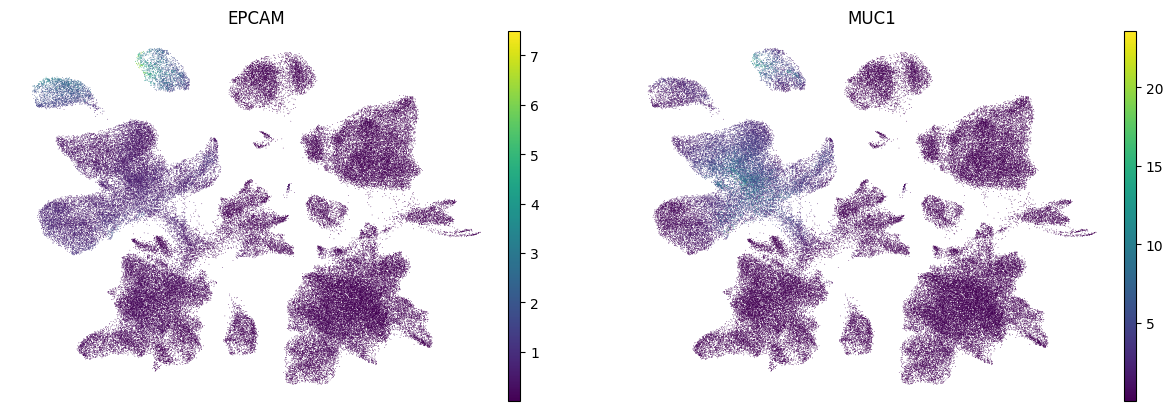

In [27]:
sc.pl.umap(adata, color=['EPCAM', 'MUC1'], frameon=False, layer='scvi_normalized')

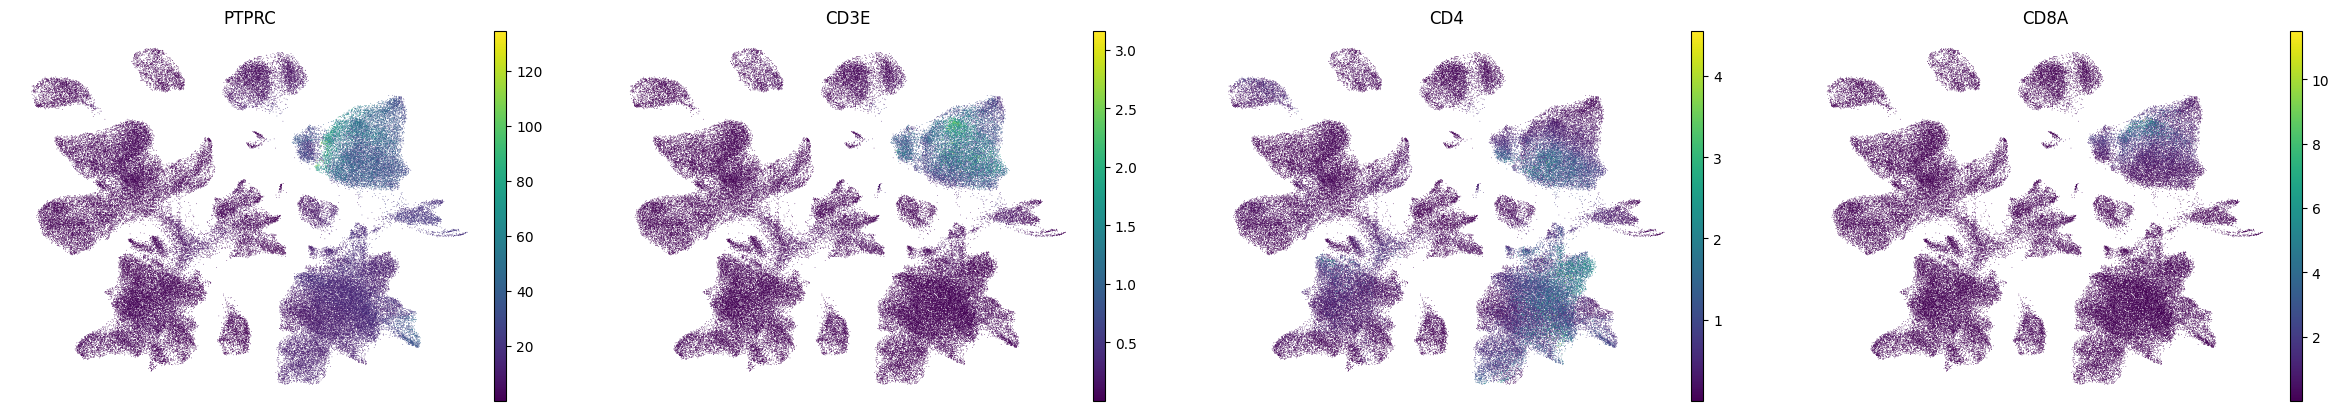

In [29]:
sc.pl.umap(adata, color = ['PTPRC', 'CD3E', 'CD4', 'CD8A'], frameon=False, layer='scvi_normalized')

If you look at CD4 and CD8A, they are sharing the same leiden region: 0 but the cell type regions look like the leiden region needs to split 0 in half for the two distinct cell types.

You will need to increase the leiden resolution; rerun the marker gene program.

c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:440: PerformanceWarning: DataFrame is h

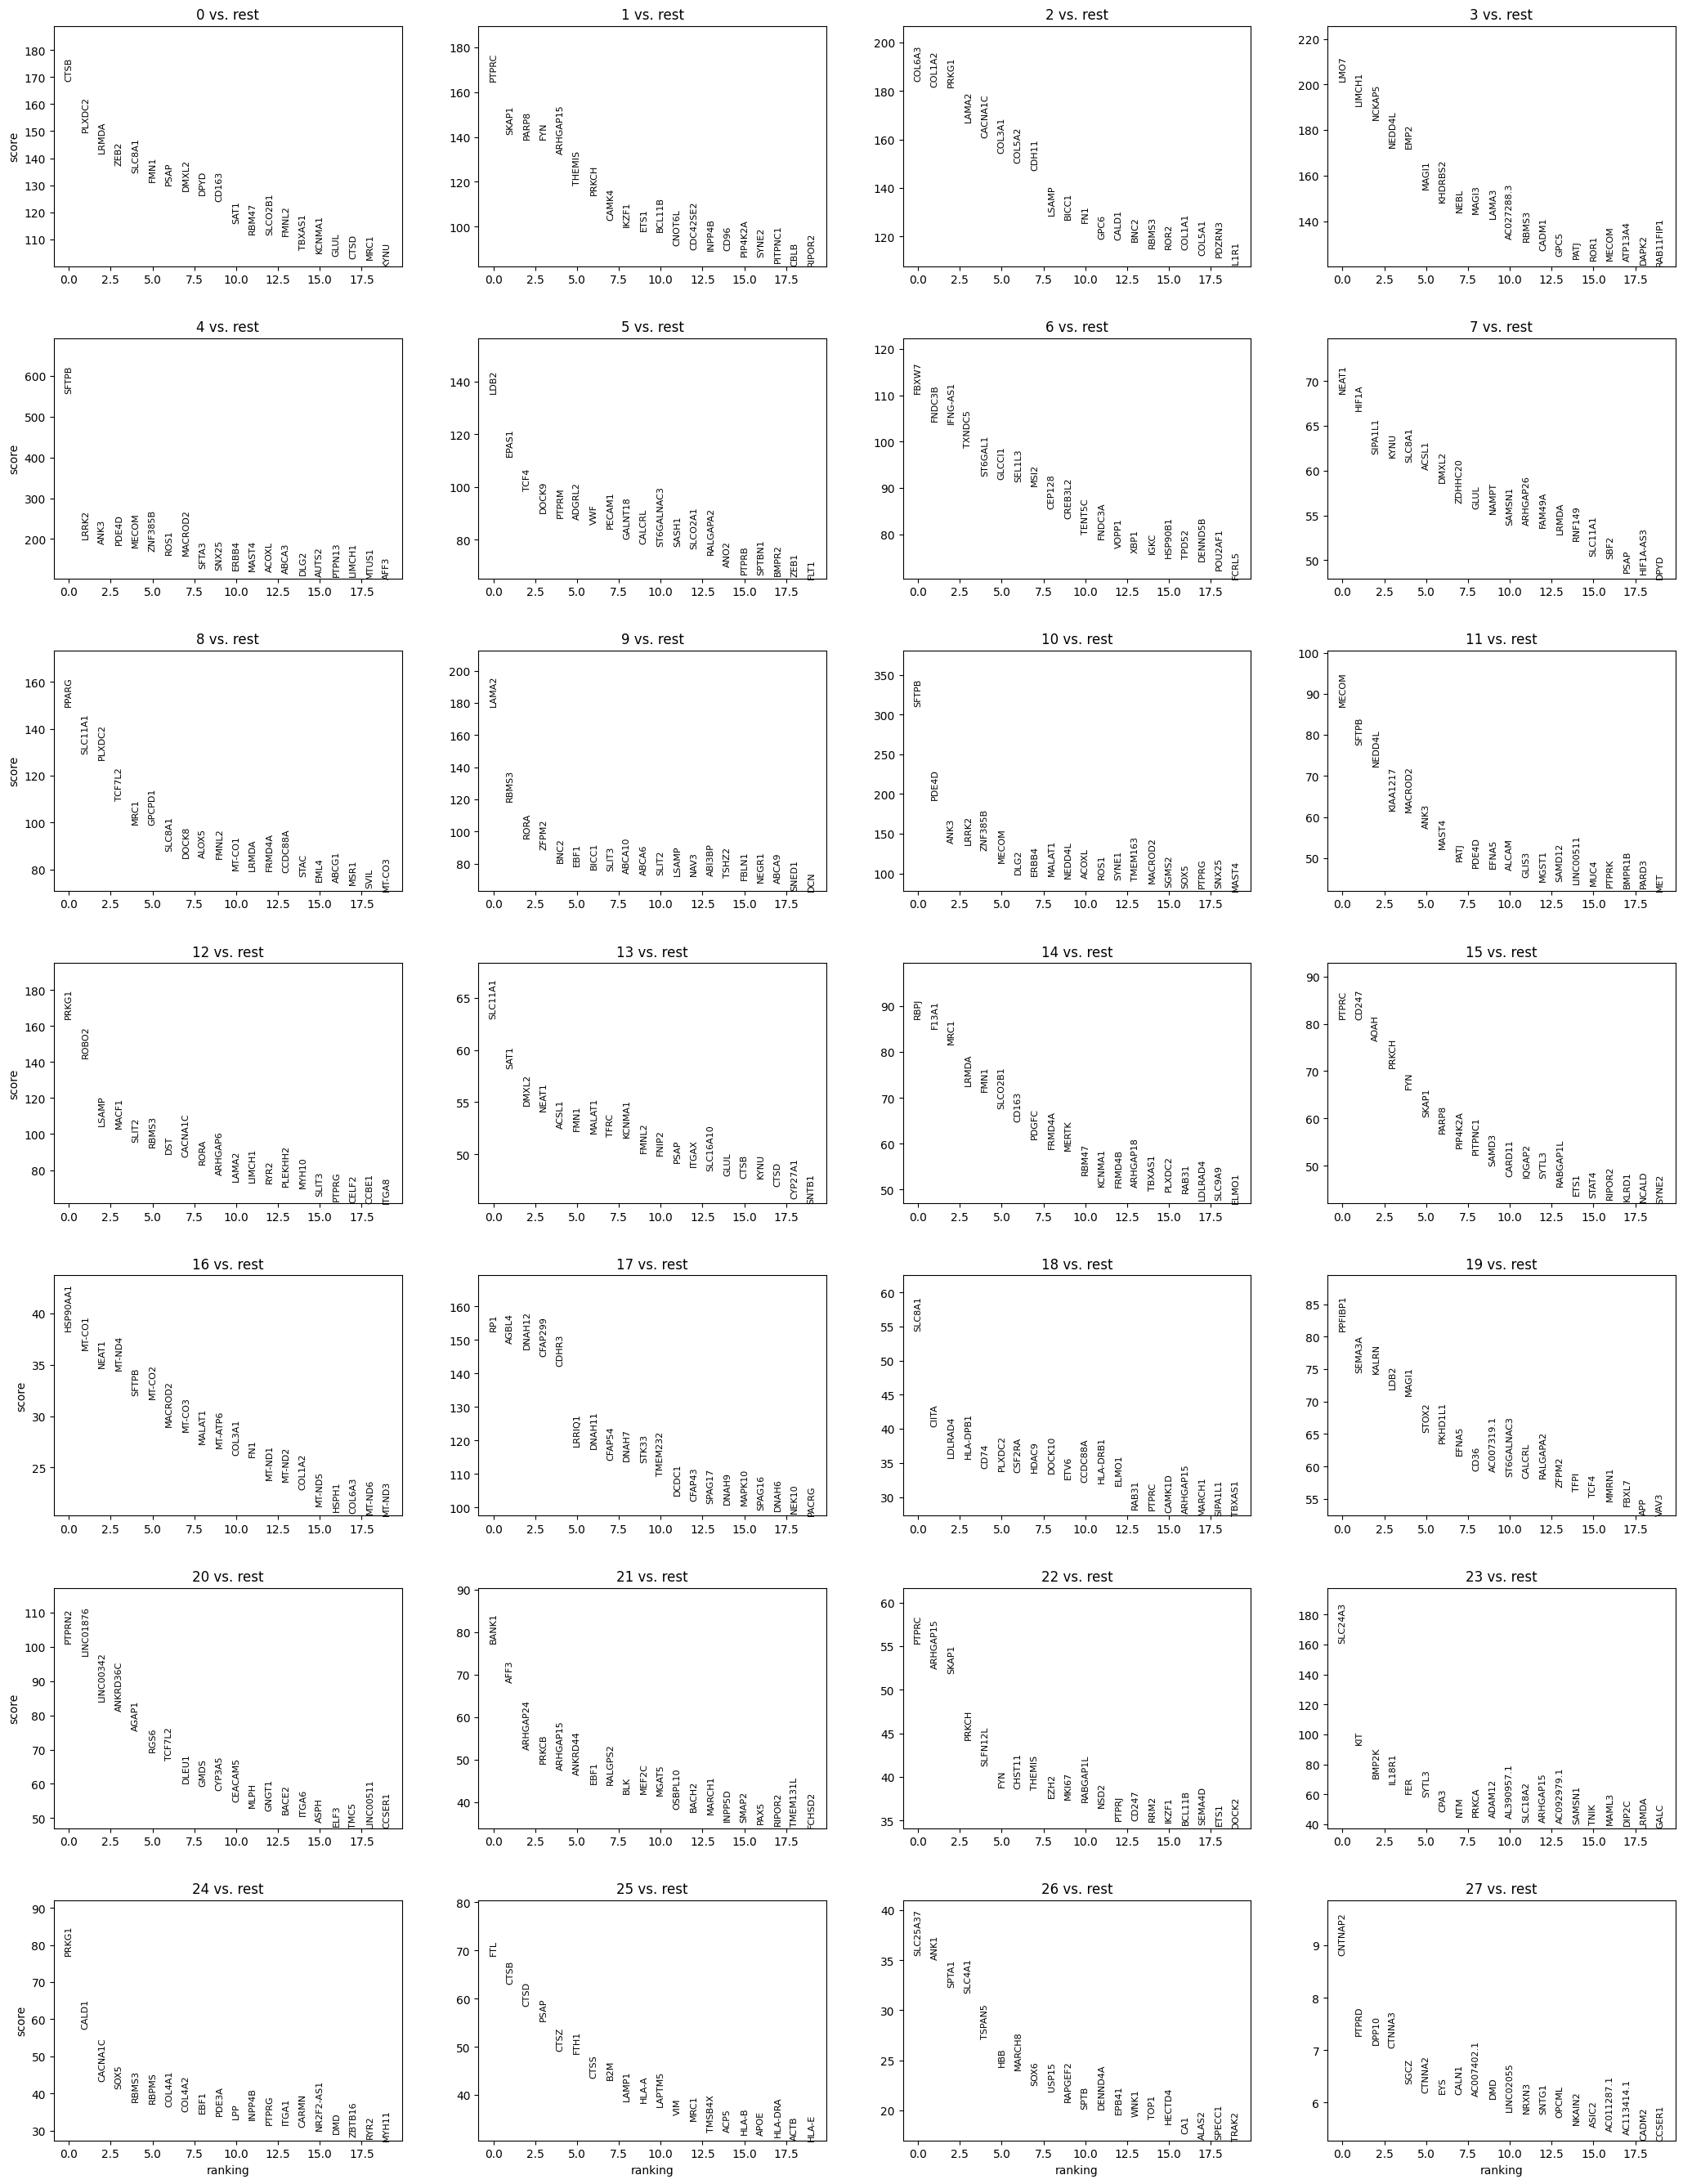

DE...: 100%|██████████| 28/28 [19:11<00:00, 41.12s/it]


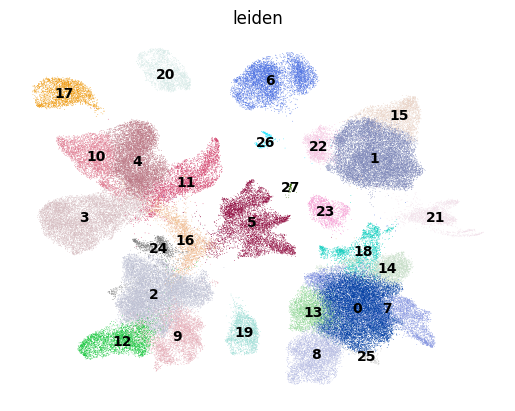

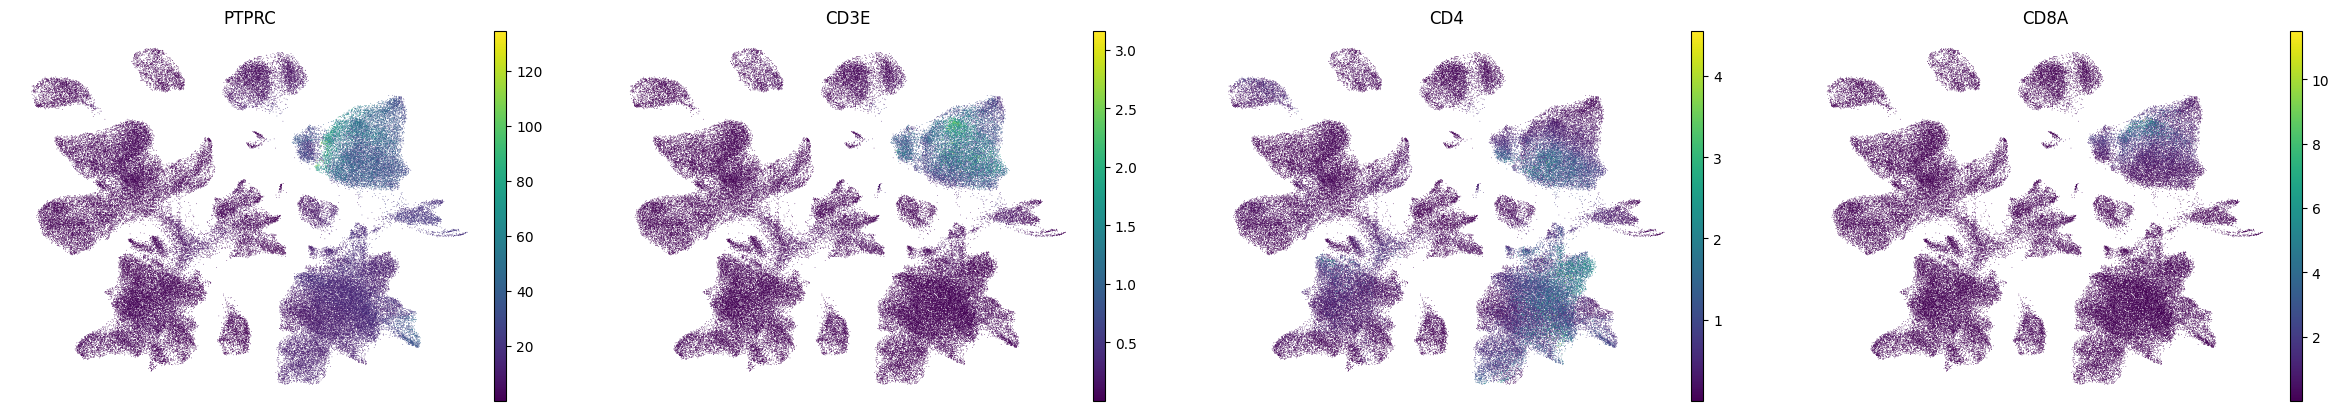

In [36]:
sc.tl.leiden(adata, resolution=1)

# Get the marker genes based on the leiden model and the raw data saved.
sc.tl.rank_genes_groups(adata, 'leiden')
#plot the top 20 marker genes.
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
# calling the differential expression from the model and grouping by leiden.
markers_scvi = model.differential_expression(groupby='leiden')
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > 0.5)]
sc.pl.umap(adata, color=['leiden'], frameon=False, legend_loc="on data")
# find Immune Cell Markers
sc.pl.umap(adata, color = ['PTPRC', 'CD3E','CD4', 'CD8A'], frameon=False, layer='scvi_normalized')

In [90]:
markers[markers.names == 'CD14']

group names     scores  logfoldchanges         pvals     pvals_adj
388        0  CD14  40.802750        4.006744  0.000000e+00  0.000000e+00
150328     7  CD14   7.216005        1.080103  6.278953e-13  1.423185e-12
277980    13  CD14   7.467212        1.323992  1.064974e-13  3.256831e-13
299067    14  CD14   8.660360        1.596600  7.795135e-18  2.764827e-17
385301    18  CD14   5.276356        1.066469  1.462417e-07  4.901409e-07
533782    25  CD14   8.065914        3.456883  3.603669e-14  1.089229e-13

In [102]:
markers_scvi[markers_scvi.group1 == '26']

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
AL512353.1    1.0000        0.0000     18.420681  0.000260  0.000005   
EPB42         1.0000        0.0000     18.420681  0.001113  0.000002   
SPTA1         1.0000        0.0000     18.420681  0.005210  0.000006   
FBXO7         1.0000        0.0000     18.420681  0.000905  0.000050   
ALAS2         1.0000        0.0000     18.420681  0.001786  0.000003   
...              ...           ...           ...       ...       ...   
NOP53-AS1     0.9116        0.0884      2.333329  0.000009  0.000005   
BCAS2         0.9116        0.0884      2.333329  0.000030  0.000024   
AC073529.1    0.9116        0.0884      2.333329  0.000247  0.000031   
ZNF17         0.9116        0.0884      2.333329  0.000012  0.000006   
POC1B         0.9116        0.0884      2.333329  0.000143  0.000065   

            pseudocounts  delta   lfc_mean  lfc_median   lfc_std  ...  \
AL512353.1           0.0   0.25   5.621921    5.653640  1.628117  ...   
EPB42                0.0   0.25   9.955584   10.030720  1.828937  ...   
SPTA1                0.0   0.25  10.531960   10.633209  1.968995  ...   
FBXO7                0.0   0.25   4.137180    4.206136  0.949888  ...   
ALAS2                0.0   0.25   9.694939    9.769168  1.789221  ...   
...                  ...    ...        ...         ...       ...  ...   
NOP53-AS1            0.0   0.25   1.265942    1.327811  1.755163  ...   
BCAS2                0.0   0.25   0.844367    0.965195  1.623872  ...   
AC073529.1           0.0   0.25   1.890419    1.654447  2.483875  ...   
ZNF17                0.0   0.25   1.163210    1.144494  1.120240  ...   
POC1B                0.0   0.25   1.208376    1.323019  1.078265  ...   

            raw_mean1  raw_mean2  non_zeros_proportion1  \
AL512353.1   0.144144   0.004659               0.130631   
EPB42        0.599099   0.000368               0.418919   
SPTA1        3.581084   0.000921               0.851351   
FBXO7        0.797297   0.076137               0.486486   
ALAS2        1.238739   0.000783               0.585586   
...               ...        ...                    ...   
NOP53-AS1    0.004505   0.005331               0.004505   
BCAS2        0.022523   0.035296               0.022523   
AC073529.1   0.225225   0.034098               0.112613   
ZNF17        0.004505   0.006989               0.004505   
POC1B        0.112613   0.083532               0.085586   

            non_zeros_proportion2  raw_normalized_mean1  raw_normalized_mean2  \
AL512353.1               0.004503              2.432116              0.032226   
EPB42                    0.000350              9.191114              0.003382   
SPTA1                    0.000727             52.515556              0.008404   
FBXO7                    0.070028             11.515729              0.587347   
ALAS2                    0.000654             17.375587              0.007174   
...                           ...                   ...                   ...   
NOP53-AS1                0.005258              0.112895              0.043986   
BCAS2                    0.026105              0.283155              0.287112   
AC073529.1               0.024696              2.766898              0.225681   
ZNF17                    0.006878              0.019967              0.053653   
POC1B                    0.073223              1.612837              0.646304   

            is_de_fdr_0.05  comparison  group1 group2  
AL512353.1            True  26 vs Rest      26   Rest  
EPB42                 True  26 vs Rest      26   Rest  
SPTA1                 True  26 vs Rest      26   Rest  
FBXO7                 True  26 vs Rest      26   Rest  
ALAS2                 True  26 vs Rest      26   Rest  
...                    ...         ...     ...    ...  
NOP53-AS1             True  26 vs Rest      26   Rest  
BCAS2                 True  26 vs Rest      26   Rest  
AC073529.1            True  26 vs Rest      26   Rest  
ZNF17                 True  

In [123]:
cell_type = {
    "0":"Monocytes",
    "1":"CD4+ T-cells",
    "2":"Fibroblasts",
    "3":"AT1",
    "4":"AT2",
    "5":"Endothelial",
    "6":"Plasma",
    "7":"Monocytes",
    "8":"Dendritic",
    "9":"Fibroblasts",
    "10":"AT2",
    "11":"Basal",
    "12":"Smooth Muscle",
    "13":"Alveolar Macrophage",
    "14":"Macrophage",
    "15":"CD8+ T-cells",
    "16":"AT2",
    "17":"Airway Epithelial",
    "18":"Macrophage",
    "19":"Endothelial ",
    "20":"Memory B",
    "21":"CD8+ T-cells",
    "22":"NK",
    "23":"Mast",
    "24":"Pericytes",
    "25":"Monocytes",
    "26":"Erythroid Precursor",
    "27":"Erythroid Precursor"
}

In [124]:
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)

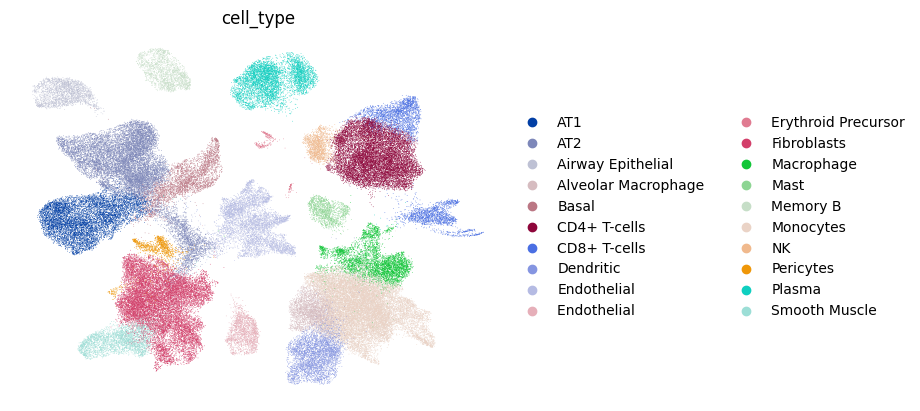

In [125]:
sc.pl.umap(adata, color = ['cell_type'], frameon=False)

In [128]:
# we are only readjusting the cell names to look better on the UMAP, we will change it back for the rest of the code.
cell_type = {
    "0":"Monocytes",
    "1":"CD4+\nT-cells",
    "2":"Fibroblasts",
    "3":"AT1",
    "4":"AT2",
    "5":"Endothelial",
    "6":"Plasma",
    "7":"Monocytes",
    "8":"Dendritic",
    "9":"Fibroblasts",
    "10":"AT2",
    "11":"Basal",
    "12":"Smooth\nMuscle",
    "13":"Alveolar\nMacrophage",
    "14":"Macrophage",
    "15":"CD8+\nT-cells ",
    "16":"AT2",
    "17":"Airway\nEpithelial",
    "18":"Macrophage",
    "19":"Endothelial ",
    "20":"Memory B",
    "21":"CD8+\nT-cells",
    "22":"NK",
    "23":"Mast",
    "24":"Pericytes",
    "25":"Monocytes",
    "26":"Erythroid\nPrecursor",
    "27":"Erythroid\nPrecursor"
}

adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)


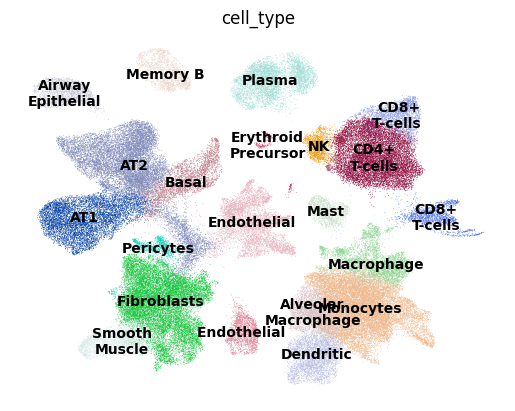

In [129]:
sc.pl.umap(adata, color = ['cell_type'], frameon=False, legend_loc='on data')

In [130]:
cell_type = {
    "0":"Monocytes",
    "1":"CD4+ T-cells",
    "2":"Fibroblasts",
    "3":"AT1",
    "4":"AT2",
    "5":"Endothelial",
    "6":"Plasma",
    "7":"Monocytes",
    "8":"Dendritic",
    "9":"Fibroblasts",
    "10":"AT2",
    "11":"Basal",
    "12":"Smooth Muscle",
    "13":"Alveolar Macrophage",
    "14":"Macrophage",
    "15":"CD8+ T-cells",
    "16":"AT2",
    "17":"Airway Epithelial",
    "18":"Macrophage",
    "19":"Endothelial ",
    "20":"Memory B",
    "21":"CD8+ T-cells",
    "22":"NK",
    "23":"Mast",
    "24":"Pericytes",
    "25":"Monocytes",
    "26":"Erythroid Precursor",
    "27":"Erythroid Precursor"
}

In [131]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [132]:
adata.write_h5ad('integrated.h5ad')

In [133]:
model.save('model.model')

## Analysis